In [198]:
import numpy as np
import pandas as pd

df = pd.read_csv('FinancialScreen_TimeSeries.csv')

In [202]:
df.head()

,Ticker,Unnamed: 1,12/31/1994,12/31/1995,12/31/1996,12/31/1997,12/31/1998,12/31/1999,12/31/2000,12/31/2001,...,12/31/2015,12/31/2016,12/31/2017,12/31/2018,12/31/2019,12/31/2020,12/31/2021,12/31/2022,12/31/2023,12/31/2024
0,BRK,Market Capitalization,NaN,NaN,40997,56793,87482,85223,108714,115599,...,324390,402026,488698,502503,553678,542551,669065,680812,776353,1003840
1,BRK,Market Cap Growth,NaN,NaN,NaN,38.53%,54.04%,-2.58%,27.56%,6.33%,...,-12.24%,23.93%,21.56%,2.82%,10.18%,-2.01%,23.32%,1.76%,14.03%,17.58%
2,BRK,Enterprise Value,NaN,-1642,41602,58058,76285,83853,106114,143070,...,336949,475622,559702,569632,592871,611456,695143,767745,866602,856259
3,BRK,PE Ratio,NaN,NaN,16.47,29.88,30.91,54.74,32.67,145.41,...,13.47,16.7,10.87,124.97,6.8,12.76,7.44,-29.91,8.07,14.84
4,BRK,PS Ratio,NaN,NaN,3.9,5.45,6.33,3.55,3.12,3,...,1.54,1.8,2.02,2.23,1.69,1.9,1.89,2.91,1.77,2.72


In [222]:
df_long = df.melt(id_vars=['Ticker', 'Unnamed: 1'], var_name='Date', value_name='Value')
df_long.columns = ['Ticker', 'Metric', 'Date', 'Value']
df_long['Date'] = pd.to_datetime(df_long['Date'], format='%m/%d/%Y')
df_long = df_long.sort_values(by=['Ticker', 'Date']).dropna().reset_index()

In [224]:
df_long

,index,Ticker,Metric,Date,Value
0,407,AFL,Interest Coverage,1994-12-31,46.53
1,414,AFL,Dividend Yield,1994-12-31,1.40%
2,415,AFL,Payout Ratio,1994-12-31,15.70%
3,417,AFL,Total Shareholder Return,1994-12-31,1.40%
4,838,AFL,Enterprise Value,1995-12-31,323
...,...,...,...,...,...
12007,13523,TRV,FCF Yield,2024-12-31,15.16%
12008,13524,TRV,Dividend Yield,2024-12-31,1.58%
12009,13525,TRV,Payout Ratio,2024-12-31,21.55%
12010,13526,TRV,Buyback Yield / Dilution,2024-12-31,0.90%


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\alexv\AppData\Local\Temp\ipykernel_5140\3439637299.py:26: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(pd.date_range(ticker_data.index[-1], periods=2, freq='A')[1:], forecast, label='Forecasted 2025', marker='o')


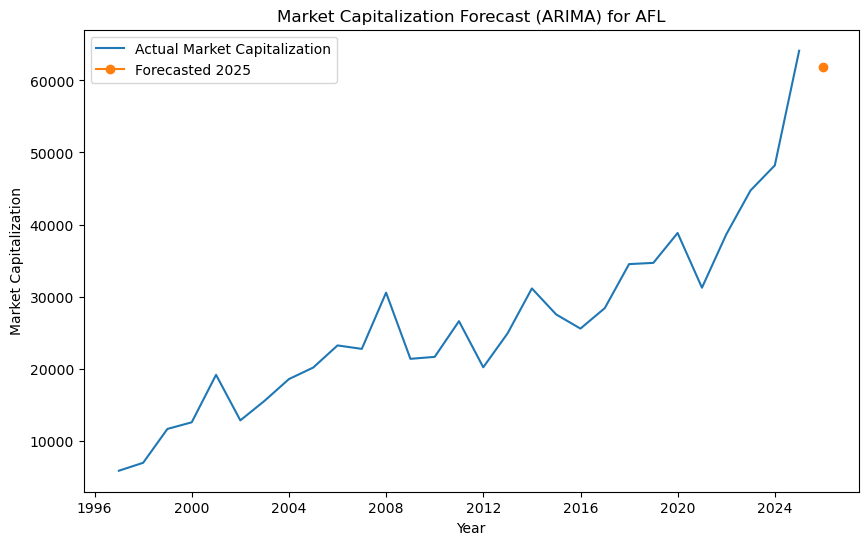

Forecasted Market Capitalization for 2025: 61866.00098833628


C:\Users\alexv\AppData\Local\Temp\ipykernel_5140\3439637299.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Forecasted Market Capitalization for 2025: {forecast[0]}")


In [240]:
from statsmodels.tsa.arima.model import ARIMA
market_cap_data = df_long[df_long['Metric'] == 'Market Capitalization']
market_cap_data = market_cap_data.sort_values('Date')

# Step 3: Set Date as the index
market_cap_data.set_index('Date', inplace=True)

# Step 4: Select the Ticker you want to forecast (e.g., 'AFL')
ticker_data = market_cap_data[market_cap_data['Ticker'] == 'AFL']['Value']

# Convert the Value column to numeric
ticker_data = pd.to_numeric(ticker_data, errors='coerce')

# Step 5: Fit the ARIMA model
# Order (p,d,q) is determined through model testing or grid search. 
# Here we use an example order (p=1, d=1, q=1), but you can optimize it further.
model = ARIMA(ticker_data, order=(1, 1, 1))
fitted_model = model.fit()

# Step 6: Forecast for 2025 (one-step forecast)
forecast = fitted_model.forecast(steps=1)

# Step 7: Plot actual data and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(ticker_data.index, ticker_data, label='Actual Market Capitalization')
plt.plot(pd.date_range(ticker_data.index[-1], periods=2, freq='A')[1:], forecast, label='Forecasted 2025', marker='o')
plt.title('Market Capitalization Forecast (ARIMA) for AFL')
plt.xlabel('Year')
plt.ylabel('Market Capitalization')
plt.legend()
plt.show()

In [242]:
# Step 8: Print the forecasted value for 2025
print(f"Forecasted Market Capitalization for 2025: {forecast[0]}")

Forecasted Market Capitalization for 2025: 61866.00098833628


C:\Users\alexv\AppData\Local\Temp\ipykernel_5140\4182838341.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Forecasted Market Capitalization for 2025: {forecast[0]}")
